# Here we are trying to predict the persons charges based on other columns using Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None


In [3]:
data=pd.read_csv('C:\\Users\\Admin\\Downloads\\archive (1)\\insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

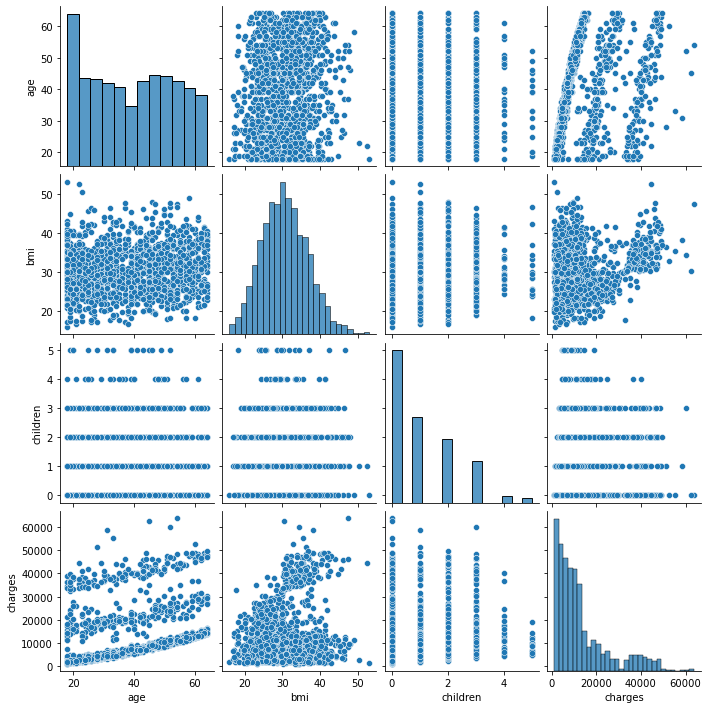

In [13]:
sns.pairplot(data)

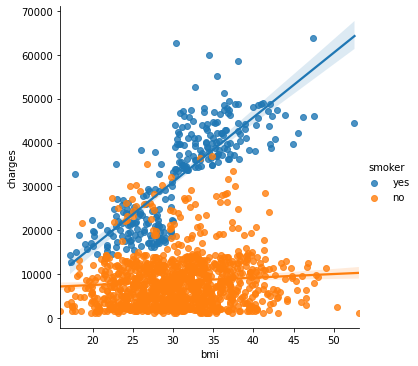

In [14]:
sns.lmplot(x='bmi',y='charges',hue='smoker',data=data)

As we can see from the plots, smoker tends to pay more charges than non smoker. The slope of the regression line of smoker is more steeper than the slope of the non smoker

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='charges'>

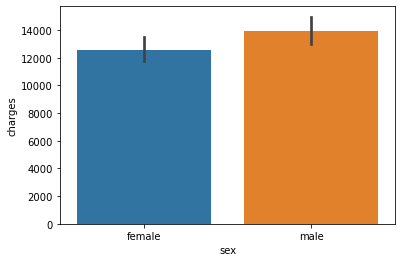

In [15]:
## CORRELATION BETWEEN SEX AND CHARGES
sns.barplot(data['sex'],data['charges'])

There is not much difference between cost paid by mail and female. Thus sex of the person does not necessarily determine the insurance charges one pays.Either I can delete it or keep it.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='charges'>

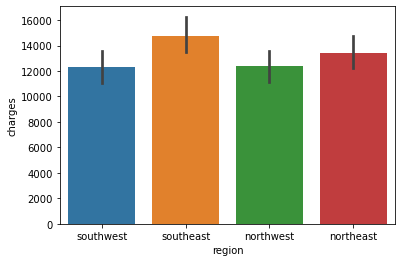

In [16]:
## CORRELATION BETWEEN REGION AND CHARGES
sns.barplot(data['region'],data['charges'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='charges'>

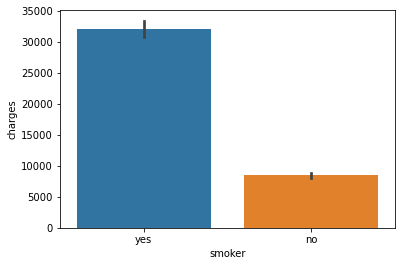

In [17]:
## CORRELATION BETWEEN SMOKER AND CHARGES
sns.barplot(data['smoker'],data['charges'])

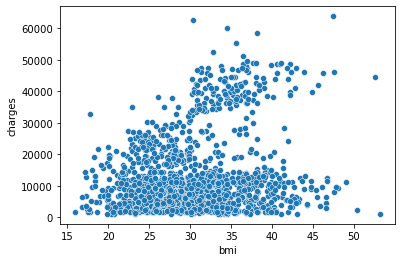

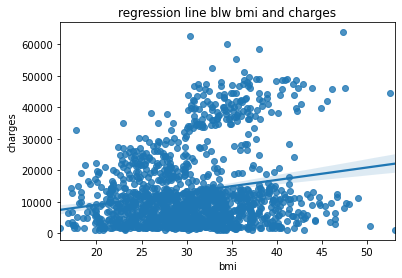

In [18]:
## CORRELATION BETWEEN BMI AND CHARGES
sns.scatterplot(x=data['bmi'],y=data['charges'])
plt.show()
plt.title('regression line blw bmi and charges')
sns.regplot(x=data['bmi'],y=data['charges'])
plt.show()

There is a postive relation between Bmi and Charges as we can see it from the regression line



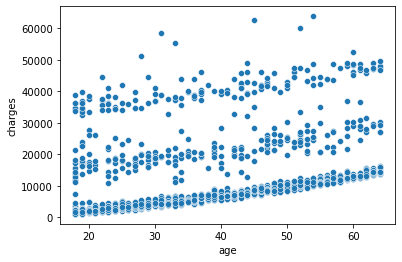

In [19]:
## CORRELATION BETWEEN AGE AND CHARGES
sns.scatterplot(x=data['age'],y=data['charges'])
plt.show()

There is a positive relation between Age and Charges

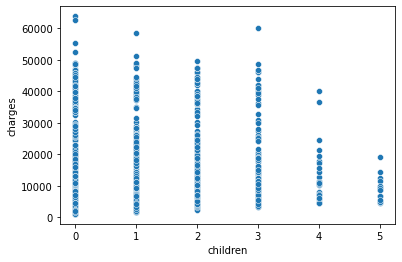

In [20]:
## CORRELATION BETWEEN CHILDREN AND CHARGES
sns.scatterplot(x=data['children'],y=data['charges'])
plt.show()

From the plot we can see people having 2 or 3 childs has more charges.



In [21]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
data['smoker']=le.fit_transform(data['smoker'])
data['region']=le.fit_transform(data['region'])



In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


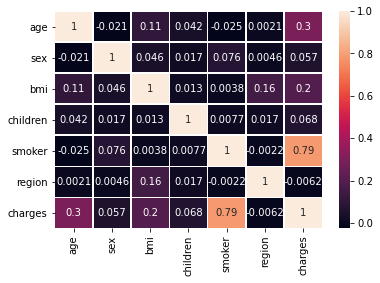

In [25]:
corr=data.corr()
sns.heatmap(corr,annot=True,linewidths=0.5,cmap=None)
plt.show()

No correlation, except with the smoking.

In [26]:
from sklearn.model_selection import train_test_split
x=data.drop('charges',axis=1)
y=data['charges']

In [27]:
x.shape

(1338, 6)

In [28]:
y.shape

(1338,)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [32]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred=lin_reg.predict(x_test)
y_pred

array([ 1.04742466e+04,  4.36347242e+03,  3.27255417e+03,  7.59399087e+03,
        3.11476584e+04,  1.65625298e+03,  7.83177619e+03,  1.10945817e+04,
        6.57534100e+03,  3.61318127e+04,  9.20418682e+03,  1.07334186e+04,
        1.08709807e+04,  6.33061130e+03,  6.66077555e+03,  1.46826742e+04,
        1.47899718e+04,  2.93270377e+03, -2.44446528e+03, -9.89163680e+02,
        9.65381211e+02,  7.61508684e+03,  3.46888598e+04,  8.36672062e+03,
        1.18778128e+04,  9.31058193e+03,  1.17936078e+04,  1.41511733e+04,
        1.24175199e+04,  2.71783193e+04,  3.09402070e+03,  6.80413696e+03,
        1.21909824e+04,  1.04128458e+04,  1.21869786e+04,  6.86094061e+03,
        1.03157394e+04,  1.05751879e+04,  1.00446193e+04,  4.73233682e+03,
        7.49210578e+03,  1.17039180e+04,  3.99308397e+03,  7.71005589e+03,
        5.59013252e+03,  3.87856636e+03,  8.93247878e+03,  6.19771637e+03,
        2.65090680e+03,  1.51915575e+04,  5.11156532e+03,  9.81733593e+03,
        1.01528608e+04,  

In [34]:
x_pred=lin_reg.predict(x_train)
x_pred


array([ 1838.69570992,  5333.87901112,  9452.73707704, ...,
        5937.62406571,  4763.32550298, 12315.96516128])

In [35]:
print(lin_reg.intercept_)
print(lin_reg.coef_)
print(lin_reg.score(x_test,y_test))

-12174.26421866096
[  264.8908836   -320.72990939   330.98326716   479.86234962
 24219.27418634  -232.03874533]
0.7099514097663597


In [36]:
print('mean absolute error',metrics.mean_absolute_error(y_test,y_pred))

mean absolute error 4109.191155586765


In [37]:
print('mean squared error',metrics.mean_squared_error(y_test,y_pred))

mean squared error 36473198.09867024


In [38]:
print('Root mean squared error',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root mean squared error 6039.304438316572


In [39]:
import statsmodels.api as sm
x_train_sm=x_train
x_train_sm=sm.add_constant(x_train_sm)
lm=sm.OLS(y_train,x_train_sm).fit()
lm.params
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     555.3
Date:                Mon, 08 Feb 2021   Prob (F-statistic):          1.98e-323
Time:                        10:55:52   Log-Likelihood:                -10836.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1063   BIC:                         2.172e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.217e+04   1073.890    -11.337      0.0

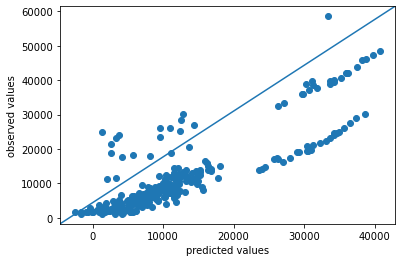

In [40]:
fig,ax=plt.subplots()
ax.plot([0,1],[0,1],transform=ax.transAxes)
plt.scatter(y_pred,y_test)
plt.xlabel('predicted values')
plt.ylabel('observed values')
plt.show()

# The result we got is good enough, but we can try to improve it a bit by reducing unimportant features.